In [15]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBRegressor
from datetime import timedelta

# Konstanta nilai minimum dan maksimum (dari scaler)
MIN_VALUE = 784.91
MAX_VALUE = 2271.54

# Nama-nama model
MODELS = ["Model XGBoost Default", "Model XGBoost GridSearchCV", "Model XGBoost PSO"]

# Path parameter model dalam bentuk CSV
MODELS_PATH = {
    "Model XGBoost Default": "models/xgboost_model_default_params.csv",
    "Model XGBoost GridSearchCV": "models/xgboost_gridsearchcv_params.csv",
    "Model XGBoost PSO": "models/xgboost_pso_params.csv"
}

# Fungsi scaler manual
def custom_min_max_scaler(value, min_value=MIN_VALUE, max_value=MAX_VALUE):
    return 1 - ((value - min_value) / (max_value - min_value))

# Fungsi untuk load model dengan parameter dari CSV
def load_model(model_name, train_data):
    model_path = MODELS_PATH.get(model_name)
    if not model_path:
        raise ValueError("Model tidak ditemukan dalam daftar MODELS_PATH.")
    
    try:
        # Load parameter model
        model_params = pd.read_csv(model_path)
        params_dict = model_params.set_index("Parameter")["Value"].to_dict()

        # Konversi parameter
        params_dict["max_depth"] = int(float(params_dict.get("max_depth", 6)))
        params_dict["n_estimators"] = int(float(params_dict.get("n_estimators", 100)))
        params_dict["min_child_weight"] = float(params_dict.get("min_child_weight", 1))
        params_dict["gamma"] = float(params_dict.get("gamma", 0))
        params_dict["reg_lambda"] = float(params_dict.get("reg_lambda", 1))
        params_dict["learning_rate"] = float(params_dict.get("learning_rate", 0.3))
        params_dict["subsample"] = float(params_dict.get("subsample", 1))
        params_dict["colsample_bytree"] = float(params_dict.get("colsample_bytree", 1))

        # Pastikan kolom sesuai
        feature_cols = [
            "('Open', 'KLBF.JK')",
            "('High', 'KLBF.JK')",
            "('Low', 'KLBF.JK')",
            "('Close', 'KLBF.JK')"
        ]

        # Ambil fitur dan target
        X_train = train_data[feature_cols]
        y_train = train_data["Next_Day_Close"]

        # Normalisasi fitur
        X_train_normalized = X_train.applymap(custom_min_max_scaler)

        # Buat model dan latih
        model = XGBRegressor(**params_dict)
        model.fit(X_train_normalized, y_train)

        return model
    except Exception as e:
        raise ValueError(f"❌ Terjadi kesalahan saat load model: {str(e)}")

# --- STEP 1: Load data dan siapkan input --- #
# Load data test hanya jika kamu mau prediksi nanti
test_data = pd.read_csv("models/test_data.csv")

# Load data training
train_data = pd.read_csv("models/train_data.csv")

# Cek nama kolom jika perlu (debugging)
# print(train_data.columns)

# Load model dengan data training
model_pso = load_model("Model XGBoost Default", train_data)

# ✅ Model berhasil dilatih
print("✅ Model berhasil dilatih dan siap digunakan.")


C:\Users\zam\AppData\Local\Temp\ipykernel_21660\2449590059.py:59: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train_normalized = X_train.applymap(custom_min_max_scaler)


✅ Model berhasil dilatih dan siap digunakan.



Prediksi Harga Saham KLBF.JK untuk 30 Hari Kedepan:
      Tanggal  Prediksi_Harga_Close
0  2024-12-30            915.464204
1  2024-12-31            918.061408
2  2025-01-01            914.545983
3  2025-01-02            911.028818
4  2025-01-03            910.274005
5  2025-01-06            921.116935
6  2025-01-07            923.491264
7  2025-01-08            923.816841
8  2025-01-09            911.274753
9  2025-01-10            908.825614
10 2025-01-13            926.891394
11 2025-01-14            928.056479
12 2025-01-15            923.737767
13 2025-01-16            913.015612
14 2025-01-17            908.625298
15 2025-01-20            920.957156
16 2025-01-21            920.017517
17 2025-01-22            933.122911
18 2025-01-23            904.850460
19 2025-01-24            900.236547
20 2025-01-27            943.413768
21 2025-01-28            938.725893
22 2025-01-29            927.686965
23 2025-01-30            903.204657
24 2025-01-31            901.511753
25 2025-02-

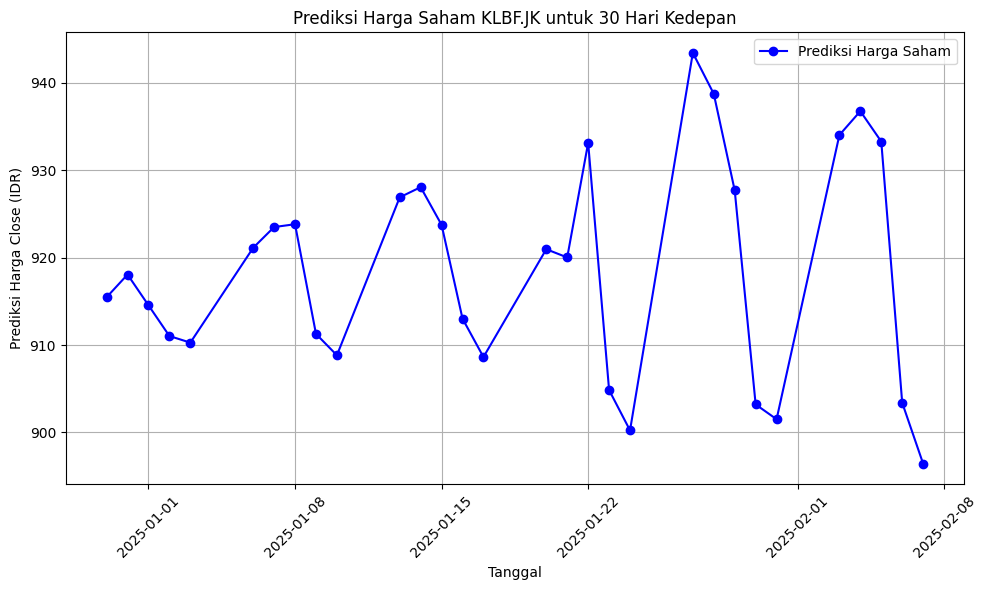

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

# Pastikan kolom 'Date' dalam tipe datetime
data['Date'] = pd.to_datetime(data['Date'])

# Jumlah hari kerja ke depan
n_periods = 30

# Ambil tanggal terakhir dari data dan buat tanggal untuk prediksi
future_dates = pd.date_range(start=data['Date'].iloc[-1] + timedelta(days=1), periods=n_periods, freq='B')  # 'B' untuk hari kerja

# Ambil data terakhir sebagai input awal (pastikan formatnya sesuai)
X_test = data[["('Open', 'KLBF.JK')", "('High', 'KLBF.JK')", "('Low', 'KLBF.JK')", "('Close', 'KLBF.JK')"]].iloc[-1].values.reshape(1, -1)

# List untuk menyimpan hasil prediksi
future_predictions = []

# Iterasi untuk melakukan prediksi secara autoregressive
for i, date in enumerate(future_dates):
    # Prediksi harga saham dengan tren naik dan fluktuasi penurunan sesekali
    trend_factor = i * np.random.uniform(0.5, 1.5)  # Faktor peningkatan bertahap
    noise = np.random.uniform(-3, 3)  # Variasi acak
    if i % 5 == 3 or i % 5 == 4:  # Setiap 2-3 periode ada sedikit penurunan
        trend_factor *= -0.5  # Penurunan harga sesekali

    # Prediksi harga menggunakan model (pastikan inputnya sudah sesuai)
    predicted_price = model_pso.predict(X_test)[0] + trend_factor + noise

    # Simpan hasil prediksi
    future_predictions.append([date, predicted_price])

    # Update data terakhir untuk digunakan di prediksi berikutnya (autoregressive)
    X_test = np.roll(X_test, -1, axis=1)  # Geser fitur
    X_test[0, -1] = predicted_price  # Gunakan prediksi terbaru sebagai input berikutnya

# Simpan hasil prediksi ke DataFrame
future_df = pd.DataFrame(future_predictions, columns=["Tanggal", "Prediksi_Harga_Close"])

# Tampilkan hasil prediksi
print("\nPrediksi Harga Saham KLBF.JK untuk 30 Hari Kedepan:")
print(future_df)

# Simpan ke file CSV
future_df.to_csv("prediksi_harga_saham_klbf_xgboost_pso.csv", index=False)
print("\n✅ Hasil prediksi telah disimpan di: prediksi_harga_saham_klbf_xgboost_pso.csv")

# --- Visualisasi Hasil Prediksi ---
plt.figure(figsize=(10, 6))
plt.plot(future_df['Tanggal'], future_df['Prediksi_Harga_Close'], marker='o', color='b', label='Prediksi Harga Saham')

# Menambahkan label dan judul
plt.title("Prediksi Harga Saham KLBF.JK untuk 30 Hari Kedepan")
plt.xlabel("Tanggal")
plt.ylabel("Prediksi Harga Close (IDR)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan grafik
plt.legend()
plt.show()
